# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes.

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [ ]:
#Our data set name is Classified_Data
#index_col=0 indicates that the first column of the CSV file should be used as the index column.
df = pd.read_csv("/Classified Data.txt",index_col=0)

In [ ]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#creating an object of standard scaler
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
# im dropping target class as it is my dependent feature and remaining are independent features .
# and standard scalling is what i have to do on my indepndent features

StandardScaler()

In [ ]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [ ]:
# df_feat is the data frame that contains all columns except last one
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [ ]:
#train test split helps us get the trainig part and the test part
from sklearn.model_selection import train_test_split

In [ ]:
#X -> features
#Y -> targets
#X_train, X_test, y_train, y_test: These variables represent the resulting datasets
#after splitting. X_train contains the training features, X_test contains the testing features,
#y_train contains the training target variable, and y_test contains the testing target variable.
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

In [ ]:
#`X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.30)` is a code snippet that performs the splitting of the dataset into training and testing sets using the `train_test_split()` function.

#Here's a breakdown of the code:

#1. `scaled_features`: This variable represents the scaled and transformed features (input variables) obtained from the previous step using the scaler.

#2. `df['TARGET CLASS']`: This is the target variable or the column that we want to predict. It is the corresponding column from the original DataFrame `df`.

#3. `test_size=0.30`: This parameter specifies the proportion of the dataset that should be allocated for testing. In this case, it indicates that 30% of the data will be used for testing, and the remaining 70% will be used for training.

#4. `train_test_split()`: This function is part of the scikit-learn library and is used to split the dataset into training and testing sets. It randomly shuffles the data and divides it into two parts based on the specified test size.

#5. `X_train, X_test, y_train, y_test`: These are variables to which the results of the `train_test_split()` function are assigned. They represent the training and testing sets for the features (`X_train` and `X_test`) and the corresponding target variable (`y_train` and `y_test`), respectively.

#After executing this code, you will have four separate sets: `X_train` (training features), `X_test` (testing features), `y_train` (training target variable), and `y_test` (testing target variable). These sets can be used for training and evaluating machine learning models.

In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 1.00213099 -0.21246339  2.539906   ... -0.62476515 -1.11009312
   0.50512128]
 [ 2.05260742 -1.23289207 -0.8883654  ... -0.97756117 -0.03031466
  -0.82318232]
 [-0.30890797  1.58891695  0.4021413  ... -0.57969899  0.24754859
  -0.29943373]
 ...
 [-0.91924416 -0.09825576  0.80249573 ...  0.80261192 -1.6429345
  -1.00266799]
 [-1.79732907 -0.11097953 -0.23041654 ...  0.52201641 -1.73376523
   0.63841267]
 [-0.95413691  0.21859211  1.11482939 ... -0.51578698 -0.97303578
   2.39365323]]
[[ 0.702431    0.60942464  0.69894458 ... -0.19108416 -1.34566411
   0.47075144]
 [ 0.84338253 -0.03712076 -1.65354495 ... -0.83958691 -0.23301692
  -0.75970083]
 [-1.03279468  1.5224077  -0.00633919 ... -0.00988379  0.12477985
  -1.32962855]
 ...
 [-0.69299626  0.38771504  1.22131964 ...  1.01219814 -0.54283852
  -0.337337  ]
 [ 1.21921528  0.70575981  0.47638214 ... -2.24578716  1.09952951
  -1.83915768]
 [-1.60431246  1.66715792  1.42148766 ...  0.98482106 -0.87899416
  -0.63058465]]
279    0
93     1

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#n_neighbors=1 is actually the K value
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
'''The value if K is selecting using a thing called "Error rate" .
if we plot a graph between Error rate and K value we see that with increase in K value , the error rate goes on deacreasing but with furthur increase . The error rate tends to increase also'''

'The value if K is selecting using a thing called "Error rate" .  \nif we plot a graph between Error rate and K value we see that with increase in K value , the error rate goes on deacreasing but with furthur increase . The error rate tends to increase also'

In [ ]:
''' so in the above statement
knn = KNeighborsClassifier(n_neighbors=1)
we are starting with K =1 to check and eventually reach the right K value .
 '''

' so in the above statement \nknn = KNeighborsClassifier(n_neighbors=1) \nwe are starting with K =1 to check and eventually reach the right K value .\n '

In [ ]:
knn.fit(X_train,y_train)

''' knn: This variable represents the KNN classifier object. It is an instance of the KNeighborsClassifier class from the scikit-learn library.

fit(): The fit() method is a common method in scikit-learn classifiers used to train the model on the given training data. '''

' knn: This variable represents the KNN classifier object. It is an instance of the KNeighborsClassifier class from the scikit-learn library.\n\nfit(): The fit() method is a common method in scikit-learn classifiers used to train the model on the given training data. '

In [ ]:
# now im testing the data
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [ ]:
# to check how good the predictions are I am gonig to use confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

[[132  21]
 [ 13 134]]


In [ ]:
# TO see my precison score  im going to see the classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       153
           1       0.86      0.91      0.89       147

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



The classification_report() function is a utility provided by scikit-learn library in Python that generates a text report showing various classification metrics for a classification model's performance. It compares the predicted labels (pred) with the true labels (y_test) from the test dataset.
y_test: This variable represents the true labels or target values from the test dataset. It is usually a one-dimensional array or Series.

pred: This variable contains the predicted labels or target values generated by the trained classifier model for the corresponding test samples. It is usually a one-dimensional array or Series.

classification_report(): This function takes the true labels (y_test) and predicted labels (pred) as input and calculates various classification metrics such as precision, recall, F1-score, and support for each class.

print(): This function is used to display the output generated by the classification_report() function.

In [ ]:
'''The above shows that we are getting a good precison recall and f1 score etc value but still how to get and exactt K VALUE ??'''

'The above shows that we are getting a good precison recall and f1 score etc value but still how to get and exactt K VALUE ??'

## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [ ]:
#going to create an error list based on different different K values
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
'''Jab ghalat prediction aati hai, toh True hai matlab 1 hota hai. Jab sahi prediction hoti hai, toh False hai matlab 0 hota hai. Hum np.mean(pred_i != y_test) se ghalat predictions ki proportion (proportion of incorrect predictions) ka mean nikalte hain'''

'Jab ghalat prediction aati hai, toh True hai matlab 1 hota hai. Jab sahi prediction hoti hai, toh False hai matlab 0 hota hai. Hum np.mean(pred_i != y_test) se ghalat predictions ki proportion (proportion of incorrect predictions) ka mean nikalte hain'

In [ ]:
'''Error rate wali list (error_rate) humein yeh bataati hai ke har K (number of neighbors) value ke liye kitni ghalat predictions hongi. '''

'Error rate wali list (error_rate) humein yeh bataati hai ke har K (number of neighbors) value ke liye kitni ghalat predictions hongi. '

Text(0, 0.5, 'Error Rate')

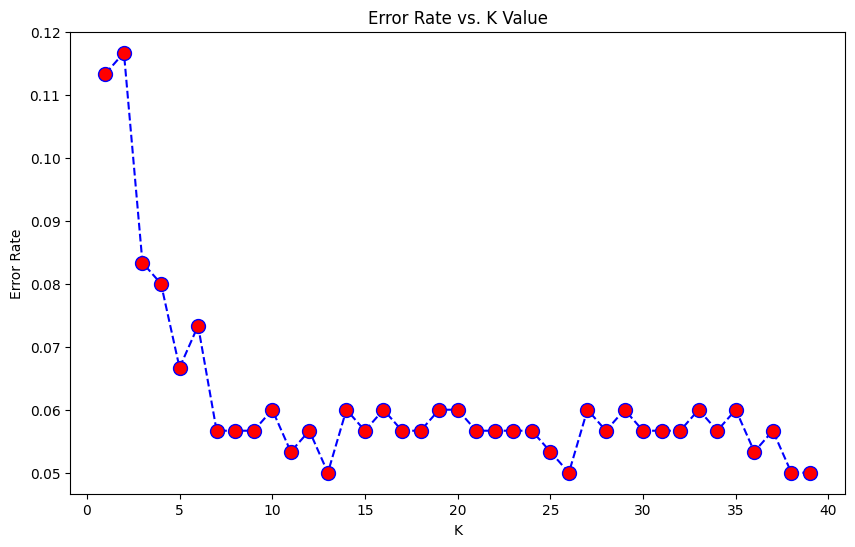

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>26 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [ ]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[125  18]
 [ 13 144]]


             precision    recall  f1-score   support

          0       0.91      0.87      0.89       143
          1       0.89      0.92      0.90       157

avg / total       0.90      0.90      0.90       300



In [ ]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=26')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=26


[[142  11]
 [  4 143]]


              precision    recall  f1-score   support

           0       0.97      0.93      0.95       153
           1       0.93      0.97      0.95       147

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



So now we can see that our accuracy has increased and according to the confusion matrix the error rate has also decreased